In [1]:
#import packages

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
from scipy import spatial
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import pylab as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Exercise 1: Dimension Reduction with PCA

In [3]:
#Import database

census = pd.read_csv('censusCrimeClean.csv')

In [4]:
#Review data types of the data frame
census.info()
census.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 102 entries, communityname to ViolentCrimesPerPop
dtypes: float64(100), int64(1), object(1)
memory usage: 1.6+ MB


communityname           object
fold                     int64
population             float64
householdsize          float64
racepctblack           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 102, dtype: object

In [5]:
census.drop('communityname', inplace= True, axis=1)

In [6]:
census.dtypes

fold                     int64
population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 101, dtype: object

[8.26130789 1.08655844]
[0.67387831 0.08863102]


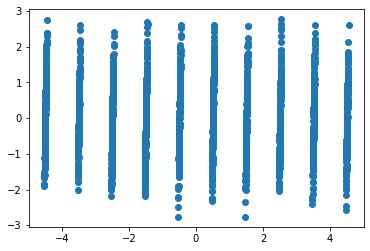

In [7]:
pca= PCA(n_components=2)
pca0 =pca.fit(census)
print(pca0.explained_variance_)
print(pca0.explained_variance_ratio_)
pca0_= pca0.fit_transform(census)
plt.scatter(pca0_[:,0],pca0_[:,1])

In [8]:
scaler= StandardScaler()
census_scaled= scaler.fit_transform(census)

In [9]:
pca1= pca.fit(census_scaled)
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)

[25.53270772 16.84283532]
[0.25267231 0.16667711]


In [10]:
columns= list(census.columns)

In [11]:
pca1_df= pd.DataFrame(data = pca1.components_, columns= columns)
pca1_df.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,-0.007828,0.053072,-0.008423,0.107445,-0.116775,-0.044960,0.068266,0.061318,0.073013,0.062503,...,0.044232,-0.003111,0.033658,-0.046556,0.014195,0.014163,0.026372,0.033880,-0.018852,0.127244
1,0.004366,0.087973,0.114270,0.006548,-0.118141,0.168013,0.161441,0.033535,0.077506,0.048863,...,0.080219,0.212684,-0.128580,-0.069300,-0.054088,-0.069797,0.028719,0.137881,0.105247,0.066192


In [12]:
pca1_dfT= pca1_df.transpose()
pca2= pca1_dfT.abs()
pca2.columns= ['PC 1','PC 2']
pca2.sort_values(by=['PC 1'],inplace=True, ascending= False)
print(pca2)

                         PC 1      PC 2
medFamInc            0.180802  0.060153
medIncome            0.179412  0.068525
PctKids2Par          0.174488  0.012355
pctWInvInc           0.173321  0.019820
PctPopUnderPov       0.172042  0.008457
...                       ...       ...
PctWorkMomYoungKids  0.008579  0.067961
householdsize        0.008423  0.114270
fold                 0.007828  0.004366
PctForeignBorn       0.003111  0.212684
pctWFarmSelf         0.002223  0.018682

[101 rows x 2 columns]


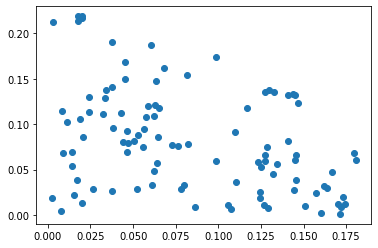

In [13]:
plt.scatter(pca2['PC 1'],pca2['PC 2'])

In [14]:
census.drop('medFamInc', inplace= True, axis=1)

In [15]:
scaler= StandardScaler()
census_scaled1= scaler.fit_transform(census)

In [16]:
pca3= pca.fit(census_scaled1)
print(pca3.explained_variance_)
print(pca3.explained_variance_ratio_)

[24.70850328 16.77606426]
[0.24696112 0.16767651]


                         PC 1      PC 2
medIncome            0.180017  0.074486
PctKids2Par          0.178371  0.005785
pctWInvInc           0.176204  0.014073
PctPopUnderPov       0.175163  0.002403
PctFam2Par           0.175114  0.005218
...                       ...       ...
fold                 0.007878  0.004664
PctWorkMomYoungKids  0.006923  0.068257
householdsize        0.006499  0.115239
pctWFarmSelf         0.003106  0.018320
PctForeignBorn       0.001561  0.213267

[100 rows x 2 columns]


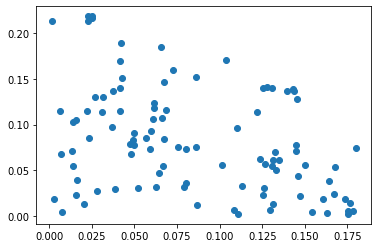

In [19]:
columns= list(census.columns)
pca3_df= pd.DataFrame(data = pca3.components_, columns= columns)
pca3_dfT= pca3_df.transpose()
pca3_= pca3_dfT.abs()
pca3_.columns= ['PC 1','PC 2']
pca3_.sort_values(by=['PC 1'],inplace=True, ascending= False)
print(pca3_)
plt.scatter(pca3_['PC 1'],pca3_['PC 2'])

## Exercise 2

In [23]:
londonBorough= pd.read_excel('london-borough-profilesV2.xlsx',sheet_name='london-borough-profilesV2')

In [24]:
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')

In [58]:
lB= londonBorough_feat
lB_= lB.fillna(lB.mean())
print(lB_.isnull().sum().sum())
print(londonBorough.select_dtypes('object').head(1
))

0
        Code  Area/INDICATOR Inner/ Outer London  \
0  E09000001  City of London        Inner London   

  % of resident population born abroad (2013)  \
0                                           -   

  Largest migrant population by country of birth (2013)  \
0                                                  -      

  % of largest migrant population (2013)  \
0                                      -   

  Second largest migrant population by country of birth (2013)  \
0                                                  -             

  % of second largest migrant population (2013)  \
0                                             -   

  Third largest migrant population by country of birth (2013)  \
0                                                  -            

  % of third largest migrant population (2013)  ...  \
0                                            -  ...   

  % of pupils whose first language is not English (2014)  \
0                                               

In [48]:
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS

distMatrix = euclidean_distances(lB_, lB_)

In [51]:
mds= MDS(random_state=0)
lB1 = mds.fit_transform(lB_)
print(lB1)

[[-4614287.78814617 -1216230.42488211]
 [-4329721.7779951  -1786611.34476163]
 [-4179659.31687253 -1550651.54939894]
 [-4289128.35486071 -1726392.52207011]
 [-4269960.31714049 -1579003.97092804]
 [-4207910.68762018 -1626347.71337746]
 [-4388912.86454812 -1284922.70723791]
 [-4145243.85489867 -1643244.08062161]
 [-4220154.86969712 -1575168.00614632]
 [-4208811.39476955 -1660200.81830353]
 [-4290808.29091349 -1681745.67101324]
 [-4349128.29310891 -1579253.6219835 ]
 [-4497980.86227708 -1440091.08587124]
 [-4332206.16277716 -1622746.10562478]
 [-4330729.70285933 -1644781.49144762]
 [-4280055.93722571 -1718676.71530899]
 [-4197225.94679694 -1590780.13436379]
 [-4269200.62765424 -1623250.521832  ]
 [-4396115.80813203 -1464725.02929805]
 [-4743492.63377981 -1097425.67555514]
 [-4408390.10320634 -1656000.68930685]
 [-4265957.6682045  -1561980.47041035]
 [-4263882.26557707 -1685169.60796069]
 [-4365741.15822014 -1650283.36665196]
 [-4219998.21587169 -1696859.08658863]
 [-4262812.4071529  -1665

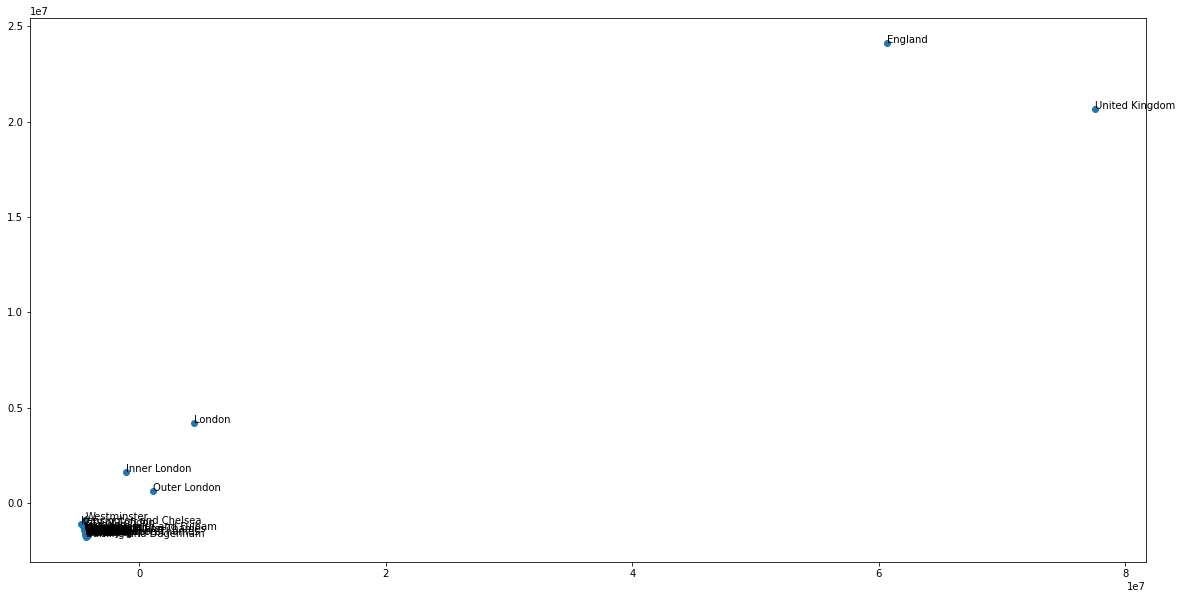

In [64]:
plt.figure(figsize=(20,10))
plt.scatter(lB1[:,0],lB1[:,1])
for i, txt in enumerate(londonBorough['Area/INDICATOR']):
    plt.annotate(txt,(lB1[:,0][i], lB1[:,1][i]))
    
plt.show()